In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Bandit problem 

In [98]:
mu, sigma = 0, 1.0 # mean and standard deviation
np.random.seed(20)
k=10
q_fn= np.random.normal(mu, sigma, k)
action_x= np.linspace(1,k,k)
print q_fn

[ 0.88389311  0.19586502  0.35753652 -2.34326191 -1.08483259  0.55969629
  0.93946935 -0.97848104  0.50309684  0.40641447]


In [97]:
np.random.normal(mu, sigma, k)

array([-0.1686461 , -3.18970279,  1.12013226,  1.33277821, -0.24333877,
       -0.13003071, -0.10901737,  1.55618644,  0.12877835, -2.06694872])

In [142]:
arr=[4+4*1e-12,23,34,5,2,4.0, 4+4*1e-11]
counter_dup,dup_arr=whether_unique(arr,4.0)
print counter_dup,dup_arr

3 [0, 5, 6]


In [44]:
for i in range(10):
    print np.random.choice(dup_arr, 1)
print dup_arr

[1]
[8]
[3]
[0]
[8]
[1]
[8]
[6]
[3]
[4]
[0, 1, 3, 4, 6, 7, 8, 9]


In [130]:
rnd=np.random.choice(dup_arr, 1)[0]
arr[rnd], rnd

(4.00000000004, 6)

In [121]:
plt.errorbar(action_x,q_fn, xerr=0.0, yerr=sigma, capsize=10, color='b', fmt='o')
plt.xlabel('action')
plt.ylabel(r'$q_*(a)$', fontsize=13)
plt.grid( )

NameError: name 'action_x' is not defined

In [13]:
reward_fn=np.random.normal(q_fn, 1.0,k)

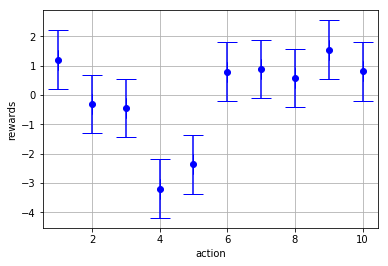

In [14]:
plt.errorbar(action_x, reward_fn, xerr=0.0, yerr=1.0, capsize=10, color='b', fmt='o')
plt.xlabel('action')
plt.ylabel('rewards')
plt.grid()

In [41]:
q_fn_star= np.random.normal(mu, sigma, k)
print q_fn_star
print bandit_ten_armed(k, q_fn_star)

[ 1.76760095 -0.78777374 -0.06172207  0.23842679  0.07477245  0.33830476
  0.27807663  1.22396588 -1.43049861  0.8544429 ]
[ 3.2744516  -0.2644398   0.35358919  0.82181433  0.83423509  0.75099494
  1.44591346  0.0114761  -3.58720387 -0.04422472]


In [53]:
np.random.seed(1)
for i in range(5):
    q_fn_star= np.random.normal(mu, sigma, k)
    print i, np.random.randint(0,10)
    print i, np.random.choice(dup_arr, 1)[0]    

0 2
0 6
1 4
1 0
2 4
2 4
3 1
3 7
4 7
4 7


In [2]:
def bandit_ten_armed(k, q_fn_star):
    reward_fn=np.random.normal(q_fn_star, 1.0,k)# generates 10 points with mean=q_fn(i) and variance 1
    return reward_fn#[action]    

def optimal_action_fn(k, q_fn_star):
    return np.argmax(q_fn_star)

def fn_action_choose(p,epsilon,Q_fn_temp):
    if p < epsilon: #prob epsilon #exploration
        action_chosen=np.random.randint(0,10) #integers is from [0,10)
        y=0
           
    else: #prob 1-epsilon
        y=1
        Q_fn_temp=Q_fn_arr[:,i,j]
        counter_dup,dup_arr=whether_unique(Q_fn_temp, np.max(Q_fn_temp))
        if counter_dup>1:#there is a tie
            action_chosen=np.random.choice(dup_arr, 1)[0]
               
        else:#there is no tie
            action_chosen=np.argmax(Q_fn_temp)  #greedy action #exploitation
    return action_chosen

def whether_unique(arr, max_val):
    eps=1e-10
    counter=0
    value_store=[]
    for j in range(len(arr)):
        if np.abs(max_val-arr[j])<eps:
                counter+=1
                value_store.append(j)
    if counter>1:
        return counter, value_store
    return counter,[]

In [11]:
k=10
N_steps=1000
N_exp=1000
mu, sigma = 0, 1.0 # mean and standard deviation
action_possible= np.linspace(0,k-1,k, dtype=int)#action goes 0 to 9

seedvalue_arr=np.linspace(1,N_exp, N_exp, dtype=int)
Q_fn_arr=np.zeros((k,N_steps+1, N_exp))

epsilon=0.1
counter_optimal=np.zeros(N_steps)
reward_arr=np.zeros((N_steps, N_exp))
for j in range(N_exp):
    N_fn_a=np.zeros(k) #N(a)
    q_fn_star= np.random.normal(mu, sigma, k)#actual q_fn_star
    for i in range(N_steps):
        p=np.random.uniform(0,1.0) 
        action_chosen=fn_action_choose(p,epsilon,Q_fn_arr[:,i,j])
        reward_possible=bandit_ten_armed(k,q_fn_star) #reward vector
        reward_obt=reward_possible[action_chosen]
        reward_arr[i,j]=reward_obt
        optimal_action=optimal_action_fn(k,q_fn_star)
        if optimal_action==action_chosen:
            counter_optimal[i]=counter_optimal[i]+1 #increasing count of optimal actions taken for i-th step in 1
        N_fn_a[action_chosen]+=1 
        Q_fn_arr[action_chosen,i,j]+=(reward_obt-Q_fn_arr[action_chosen,i,j])/N_fn_a[action_chosen]
        Q_fn_arr[:,i+1,j]=Q_fn_arr[:,i,j]# we should not forget reward estimate for previous step
        
counter_optimal=100*counter_optimal/N_exp
reward_arr=np.mean(reward_arr, axis=1)

In [13]:
k=10
N_steps=1000
N_exp=1000
mu, sigma = 0, 1.0 # mean and standard deviation
action_possible= np.linspace(0,k-1,k, dtype=int)#action goes 0 to 9

seedvalue_arr=np.linspace(1,N_exp, N_exp, dtype=int)
Q_fn_arr=np.zeros((k,N_steps+1, N_exp))

epsilon=0.0
counter_optimal_greedy=np.zeros(N_steps)
reward_arr_greedy=np.zeros((N_steps, N_exp))
for j in range(N_exp):
    N_fn_a=np.zeros(k) #N(a)
    q_fn_star= np.random.normal(mu, sigma, k)#actual q_fn_star
    for i in range(N_steps):
        p=np.random.uniform(0,1.0) 
        action_chosen=fn_action_choose(p,epsilon, Q_fn_arr[:,i,j])
        reward_possible=bandit_ten_armed(k,q_fn_star) #reward vector
        reward_obt=reward_possible[action_chosen]
        reward_arr_greedy[i,j]=reward_obt
        optimal_action=optimal_action_fn(k,q_fn_star)
        if optimal_action==action_chosen:
            counter_optimal_greedy[i]+=1 #increasing count of optimal actions taken for i-th step in 1
        N_fn_a[action_chosen]+=1 
        Q_fn_arr[action_chosen,i,j]+=(reward_obt-Q_fn_arr[action_chosen,i,j])/N_fn_a[action_chosen]
        Q_fn_arr[:,i+1,j]=Q_fn_arr[:,i,j]# we should not forget reward estimate for previous step
        
counter_optimal_greedy=100*counter_optimal/N_exp
reward_arr_greedy=np.mean(reward_arr_greedy, axis=1)

In [16]:
k=10
N_steps=1000
N_exp=1000
mu, sigma = 0, 1.0 # mean and standard deviation
action_possible= np.linspace(0,k-1,k, dtype=int)#action goes 0 to 9

seedvalue_arr=np.linspace(1,N_exp, N_exp, dtype=int)
Q_fn_arr=np.zeros((k,N_steps+1, N_exp))

epsilon=0.01
counter_optimal_small_eps=np.zeros(N_steps)
reward_arr_small_eps=np.zeros((N_steps, N_exp))
for j in range(N_exp):
    N_fn_a=np.zeros(k) #N(a)
    q_fn_star= np.random.normal(mu, sigma, k)#actual q_fn_star
    for i in range(N_steps):
        p=np.random.uniform(0,1.0) 
        action_chosen=fn_action_choose(p,epsilon, Q_fn_arr[:,i,j])
        reward_possible=bandit_ten_armed(k,q_fn_star) #reward vector
        reward_obt=reward_possible[action_chosen]
        reward_arr_small_eps[i,j]=reward_obt
        optimal_action=optimal_action_fn(k,q_fn_star)
        if optimal_action==action_chosen:
            counter_optimal_small_eps[i]+=1 #increasing count of optimal actions taken for i-th step in 1
        N_fn_a[action_chosen]+=1 
        Q_fn_arr[action_chosen,i,j]+=(reward_obt-Q_fn_arr[action_chosen,i,j])/N_fn_a[action_chosen]
        Q_fn_arr[:,i+1,j]=Q_fn_arr[:,i,j]# we should not forget reward estimate for previous step
        
counter_optimal_small_eps=100*counter_optimal_small_eps/N_exp
reward_arr_small_eps=np.mean(reward_arr_small_eps, axis=1)

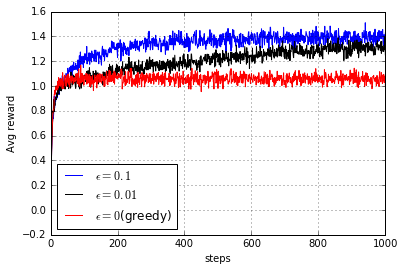

In [17]:
x=np.linspace(1,N_steps,N_steps)
plt.plot(x, reward_arr, 'b-', label=r'$\epsilon=0.1$')
plt.plot(x, reward_arr_small_eps, 'k-',label=r'$\epsilon=0.01$')
plt.plot(x, reward_arr_greedy, 'r-', label=r'$\epsilon=0$(greedy)')
plt.xlabel('steps')
plt.ylabel('Avg reward')
plt.grid()
plt.legend(loc='best')
#plt.savefig('reward_neg_new.eps')

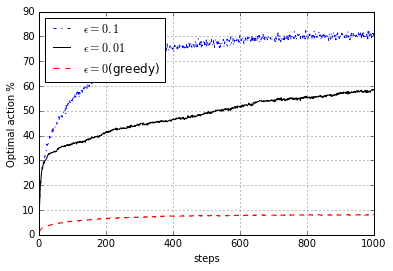

In [19]:
x=np.linspace(1,N_steps,N_steps)
plt.plot(x, counter_optimal, 'b-.', label=r'$\epsilon=0.1$')
plt.plot(x, counter_optimal_small_eps, 'k-',label=r'$\epsilon=0.01$')
plt.plot(x, counter_optimal_greedy, 'r--',  label=r'$\epsilon=0$(greedy)')
plt.xlabel('steps')
plt.ylabel(r'Optimal action %')
plt.grid()
plt.legend(loc='best')
#plt.savefig('optimal_neg_reward_new.eps')

In [8]:
sigma=1.0
mu=0.0
N_exp=2000
k=10
mean_arr=np.zeros(N_exp)
seedvalue_arr=np.linspace(1,N_exp, N_exp, dtype=int)
for j in range(N_exp):
    ###
    np.random.seed(seedvalue_arr[j])
    q_fn_star= np.random.normal(mu, sigma, k)#actual q_fn_star
    mean_arr[j]= np.mean(q_fn_star)

[   7.   38.  140.  335.  483.  487.  331.  125.   48.    6.]
[   7.   38.  140.  335.  483.]
[-1.04805438 -0.83896131 -0.62986824 -0.42077517 -0.2116821  -0.00258903
  0.20650404  0.41559711  0.62469017  0.83378324  1.04287631]
neg area 209.720348702
pos area 208.465790286


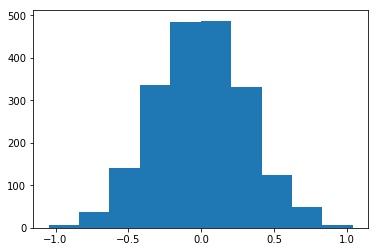

In [9]:
values, bins, _ = plt.hist(mean_arr, normed=False)
area = sum(np.diff(bins)*values)
print values
print values[0:5]
print bins
print 'neg area',np.sum(np.diff(bins)[0:5]*values[0:5])
print 'pos area', np.sum(np.diff(bins)[5:]*values[5:])
#print np.sum(bins[0:6]*values[0:6])
#print np.sum(bins[7:-1]*values[7:])

In [10]:
sigma=1.0
mu=0.0
N_exp=2000
k=10
mean_arr=np.zeros(N_exp)
seedvalue_arr=np.linspace(4*N_exp, 5*N_exp,N_exp, dtype=int)
for j in range(N_exp):
    ###
    np.random.seed(seedvalue_arr[j])
    q_fn_star= np.random.normal(mu, sigma, k)#actual q_fn_star
    mean_arr[j]= np.mean(q_fn_star)

[  17.   47.  135.  277.  500.  494.  302.  163.   57.    8.]
[  17.   47.  135.  277.  500.]
[ 494.  302.  163.   57.    8.]
[ 0.19621402  0.19621402  0.19621402  0.19621402  0.19621402  0.19621402
  0.19621402  0.19621402  0.19621402  0.19621402]
negative area 191.50488545
positive area 200.923158504


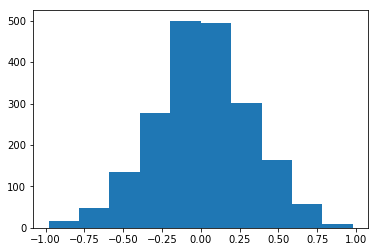

In [11]:
values, bins, _ = plt.hist(mean_arr, normed=False)
area = sum(np.diff(bins)*values)
print values
print values[0:5]
print values[5:]
print np.diff(bins)
print 'negative area', np.sum(np.diff(bins)[0:5]*values[0:5])
print 'positive area', np.sum(np.diff(bins)[5:]*values[5:])